In [1]:
import numpy as np
import torch, os
from gern.gern import GeRN
from gern.data import GernDataLoader, GernDataset
import gern.data
import matplotlib.pyplot as plt

In [2]:
def t2n_normi(t):
    # normalise and convert image tensor [B, C, H, W]
    size = t.size()
    t = t.view(size[0], -1)
    vmax, vmin = t.max(dim=1, keepdim=True)[0], t.min(dim=1, keepdim=True)[0]
    t = (t - vmin) / (vmax - vmin)
    t = t.view(size).permute(0, 2, 3, 1)
    return t.detach().cpu().numpy()

In [3]:
# set up dataset
data_rootdir = '/home/yen/data/gern/phase/test/samples'
ckpt_rootdir = '/home/yen/data/gern/results/checkpoints/rank/00/run/000'
gds = GernDataset(data_rootdir)
N, M = len(gds), len(os.listdir(ckpt_rootdir))
print('The dataset has {:,} samples'.format(N))
print('We have {:,} model checkpoints.'.format(M))

The dataset has 17,070 samples
We have 602 model checkpoints.


In [12]:
# load model
chkpt = 601 # np.random.randint(0, 602)

network = GeRN()
network.load_state_dict(torch.load(os.path.join(ckpt_rootdir, 'chkpt_{:08d}.pth'.format(chkpt))))
network = network.cuda()

GeRN: 32,473,873 trainable parameters.


In [48]:
# sample data
index = np.random.randint(0, N)
print('Drawing sample #{}'.format(index))
_C, _Q, lab = gds[index]

# unpack and copy to GPU
cnd_x, cnd_m, cnd_k, cnd_v = [c.unsqueeze(0).cuda() for c in _C]
qry_x, qry_m, qry_k, qry_v = [q.unsqueeze(0).cuda() for q in _Q]
lab = lab.cuda()

In [63]:
with torch.set_grad_enabled(False):
    asteps = 24
    output = network.predict(cnd_x, cnd_m, cnd_k, cnd_v, qry_v, asteps=asteps)

In [64]:
rgbv = t2n_normi(output.rgbv)

Text(0.5,0.98,'Sample: 9318')

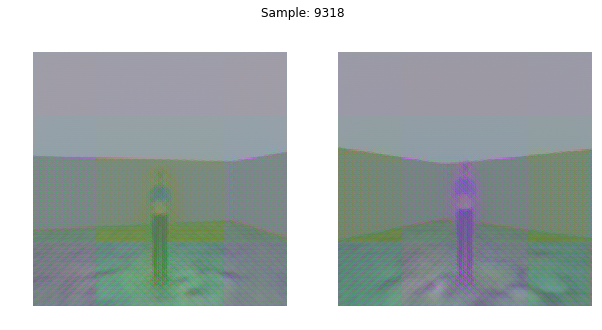

In [62]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(rgbv[0]), plt.axis('off')
plt.subplot(122)
plt.imshow(rgbv[-1]), plt.axis('off')
plt.suptitle('Sample: {}'.format(index))

Text(0.5,0.98,'Sample: 9318')

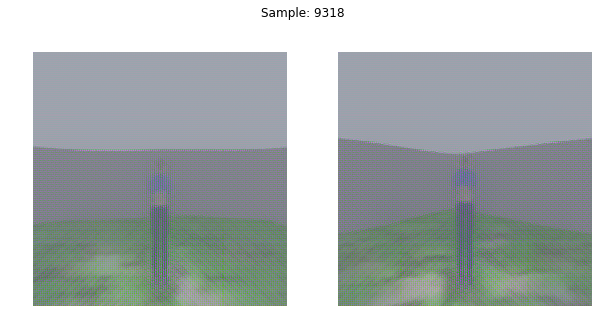

In [65]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(rgbv[0]), plt.axis('off')
plt.subplot(122)
plt.imshow(rgbv[-1]), plt.axis('off')
plt.suptitle('Sample: {}'.format(index))